In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from matplotlib import colors
import numpy as np
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

In [104]:
df=pd.read_csv("D:/Machine Learning/thuc hanh/datasets/Customer marketing(at2).csv")
df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_With,Children,Family_Size,Total_Spent,Total_Accept
0,2,46344,38,11,1,6,2,1,6,2,...,0,0,0,0,69,1,2,3,27,0
1,2,26646,26,11,4,20,10,3,5,2,...,0,0,0,0,39,2,1,3,53,0
2,4,58293,94,173,43,118,46,27,15,5,...,0,0,0,0,42,2,1,3,422,0
3,4,33454,32,76,10,56,3,1,23,2,...,0,0,0,0,38,2,1,3,169,0
4,4,30351,19,14,0,24,3,3,2,1,...,0,0,0,1,49,2,1,3,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,3,44802,71,853,10,143,13,10,20,2,...,0,0,0,0,53,1,0,1,1049,0
1206,2,26816,50,5,1,6,3,4,3,1,...,0,0,0,0,37,1,0,1,22,0
1207,2,34421,81,3,3,7,6,2,9,1,...,0,0,0,0,49,2,1,3,30,0
1208,2,56981,91,908,48,217,32,12,24,1,...,0,0,0,0,42,1,0,1,1241,1


In [105]:
df_scaled=StandardScaler().fit_transform(df)

PCA

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [107]:
df_reduction = pd.DataFrame(pca.transform(df_scaled), columns=['PCA_1','PCA_2'])

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

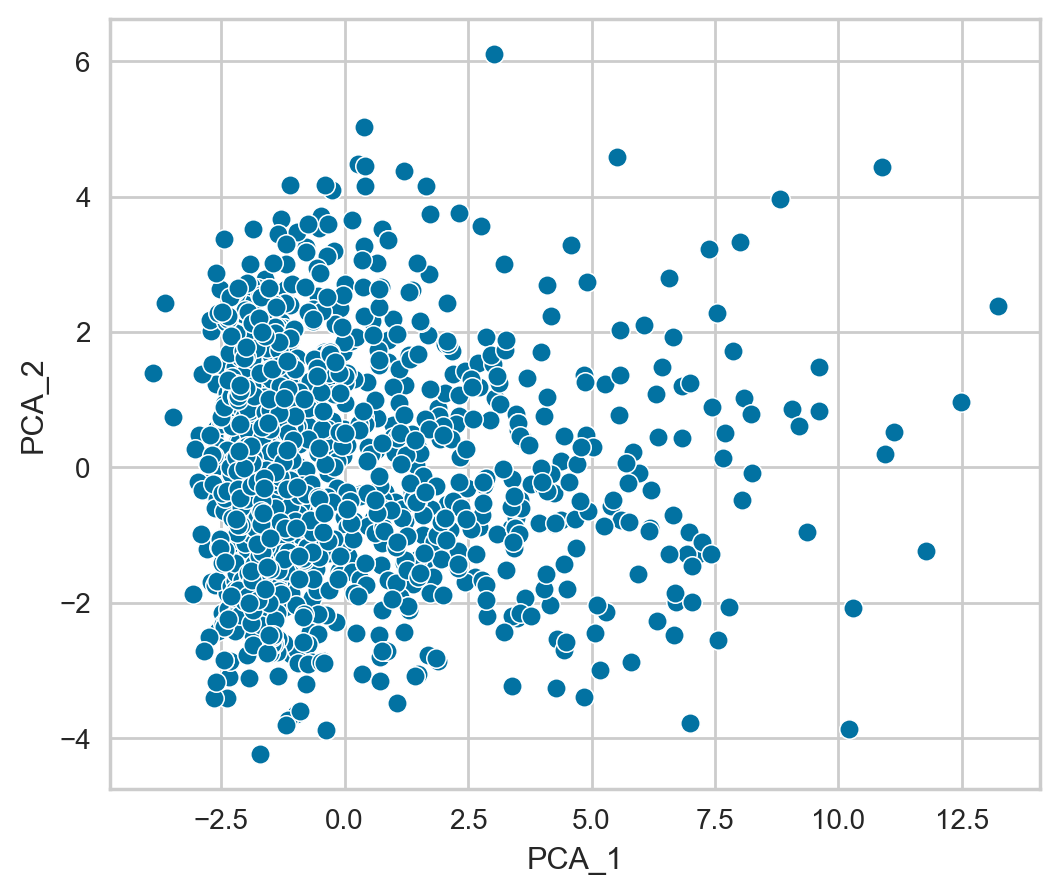

In [108]:
plt.figure(figsize=(6,5),dpi=200)
sns.scatterplot(x=df_reduction['PCA_1'],y=df_reduction['PCA_2'])


kmeans

In [109]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [110]:
df_reduction1 = df_reduction.copy()
df_reduction1

,PCA_1,PCA_2
0,-1.556245,-1.176054
1,-1.581689,0.555592
2,4.905550,2.735511
3,-0.345759,-0.088774
4,-1.402452,-0.514920
...,...,...
1205,6.646240,1.928442
1206,-2.155633,2.647893
1207,-2.134485,0.242646
1208,8.806652,3.967277


c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the

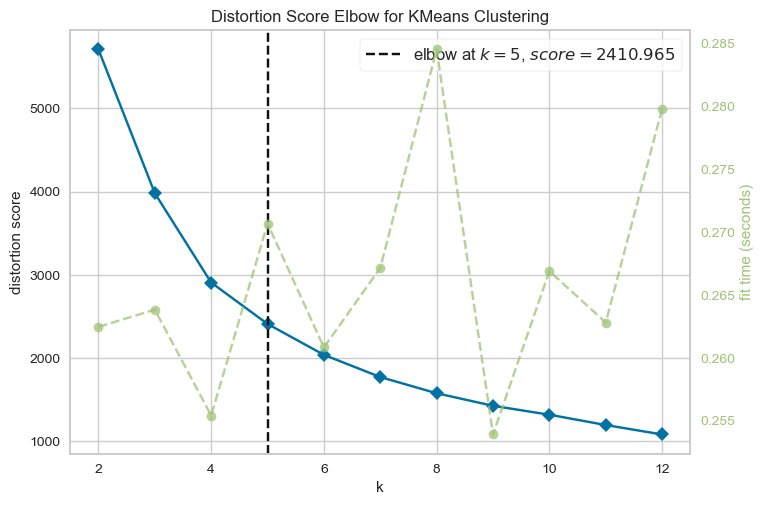

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
elbow = KElbowVisualizer(estimator=KMeans(), k=12, metric='distortion')
elbow.fit(df_reduction1)
elbow.show()

In [113]:
elbow.elbow_value_

4

In [114]:
KMeans_model = KMeans(n_clusters=5,random_state=101)
y_pred = KMeans_model.fit_predict(df_reduction1)

#Add cluster to reduction dataset
df_reduction1['Cluster'] = y_pred

#Add cluster to original dataset
df['Cluster'] = y_pred

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



In [115]:
from sklearn.metrics import silhouette_score

# Giả sử df_reduction_t là bộ dữ liệu của bạn với cột 'Cluster' đã được thêm vào
silhouette_avg = silhouette_score(df_reduction1.iloc[:, :-1], df_reduction1['Cluster'])
print(f"Điểm Silhouette: {silhouette_avg}")


Điểm Silhouette: 0.373664142835068


In [116]:
df_reduction1

,PCA_1,PCA_2,Cluster
0,-1.556245,-1.176054,3
1,-1.581689,0.555592,0
2,4.905550,2.735511,2
3,-0.345759,-0.088774,0
4,-1.402452,-0.514920,3
...,...,...,...
1205,6.646240,1.928442,2
1206,-2.155633,2.647893,0
1207,-2.134485,0.242646,0
1208,8.806652,3.967277,2


Text(0.5, 1.0, 'KMeans')

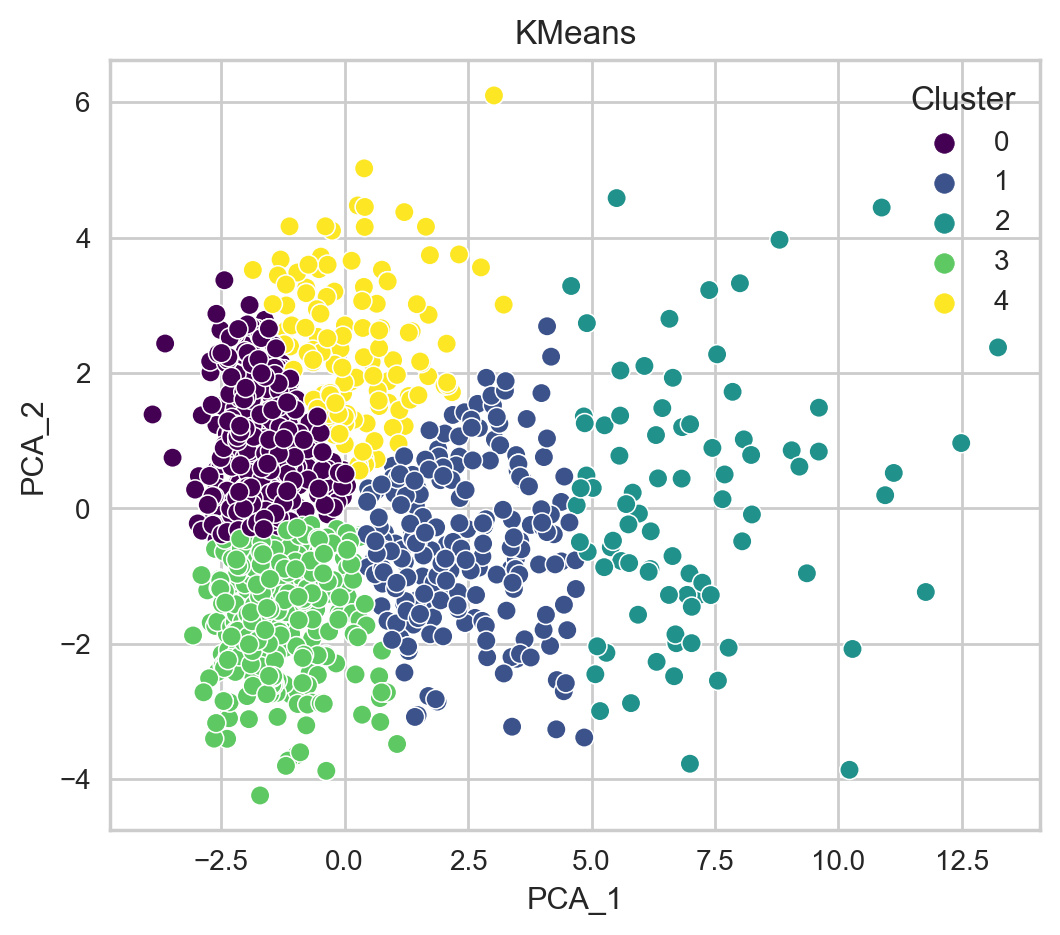

In [117]:
plt.figure(figsize=(6,5),dpi=200)
sns.scatterplot(x=df_reduction1['PCA_1'],y=df_reduction1['PCA_2'],hue=df_reduction1['Cluster'],  palette='viridis', legend='full')
plt.title('KMeans')

Text(0.5, 1.0, 'KMeans')

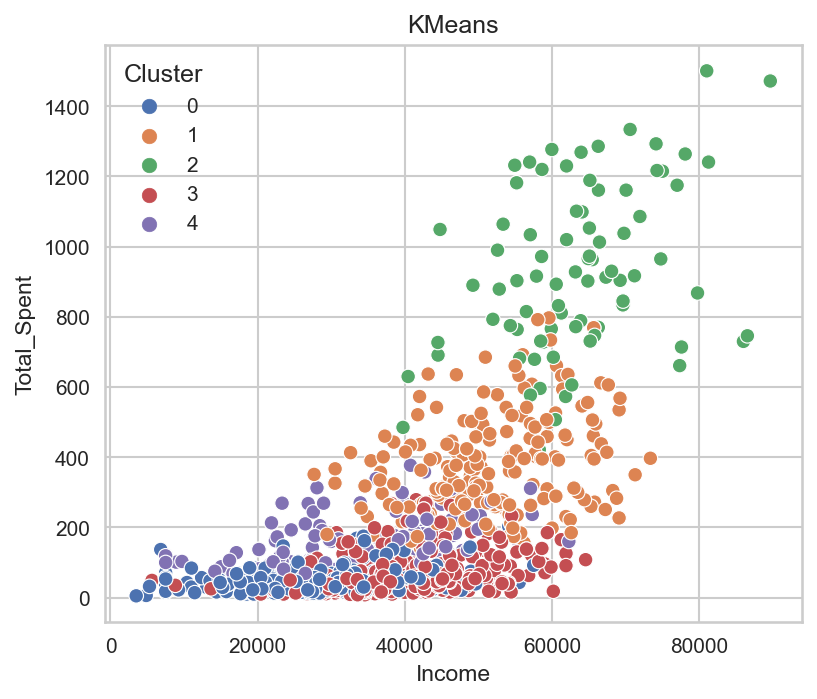

In [118]:
plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(x=df['Income'],y=df['Total_Spent'],hue=df['Cluster'], palette='deep')
plt.title('KMeans')

DBScan

In [119]:
df_reduction2 = df_reduction.copy()
df_reduction2

,PCA_1,PCA_2
0,-1.556245,-1.176054
1,-1.581689,0.555592
2,4.905550,2.735511
3,-0.345759,-0.088774
4,-1.402452,-0.514920
...,...,...
1205,6.646240,1.928442
1206,-2.155633,2.647893
1207,-2.134485,0.242646
1208,8.806652,3.967277


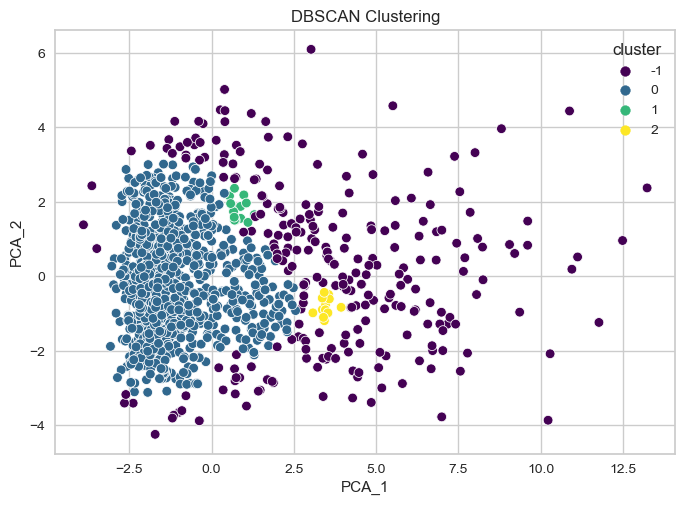

In [121]:
df_reduction2 = df_reduction.copy()
df_reduction2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

eps = 0.5
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples,  algorithm='auto',)
clusters = dbscan.fit_predict(df_reduction2)


import seaborn as sns

# Assuming df_reduction2 is a DataFrame with columns 'PCA_1' and 'PCA_2'
df_reduction2['cluster'] = clusters

# Visualize the results
sns.scatterplot(x=df_reduction2['PCA_1'], y=df_reduction2['PCA_2'], hue=df_reduction2['cluster'], palette='viridis', legend='full')

# Set plot labels
plt.title('DBSCAN Clustering')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

# Show the plot
plt.show()


In [122]:
from sklearn.metrics import silhouette_score

# Giả sử df_reduction_t là bộ dữ liệu của bạn với cột 'Cluster' đã được thêm vào
silhouette_avg = silhouette_score(df_reduction2.iloc[:, :-1], df_reduction2['cluster'])
print(f"Điểm Silhouette: {silhouette_avg}")

Điểm Silhouette: 0.06736134485197719


In [124]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

# Sử dụng MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans.fit(df_reduction2)

# Lấy các trung tâm cụm và dự đoán cụm cho các điểm dữ liệu
centers = kmeans.cluster_centers_
labels = kmeans.labels_


c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4



In [125]:
df_reduction_t=df_reduction.copy()

In [126]:
df_reduction_t

,PCA_1,PCA_2
0,-1.556245,-1.176054
1,-1.581689,0.555592
2,4.905550,2.735511
3,-0.345759,-0.088774
4,-1.402452,-0.514920
...,...,...
1205,6.646240,1.928442
1206,-2.155633,2.647893
1207,-2.134485,0.242646
1208,8.806652,3.967277


c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

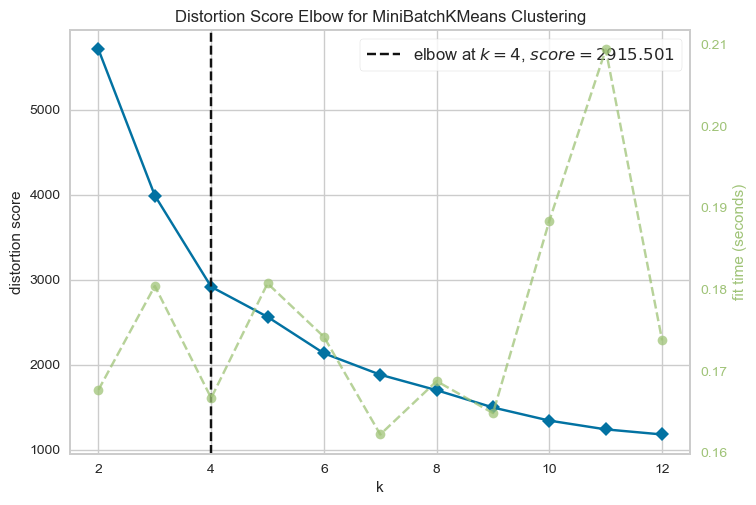

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
elbow = KElbowVisualizer(estimator=MiniBatchKMeans(), k=12, metric='distortion')
elbow.fit(df_reduction_t)
elbow.show()

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4



Text(0.5, 1.0, 'MiniBatchKMeans')

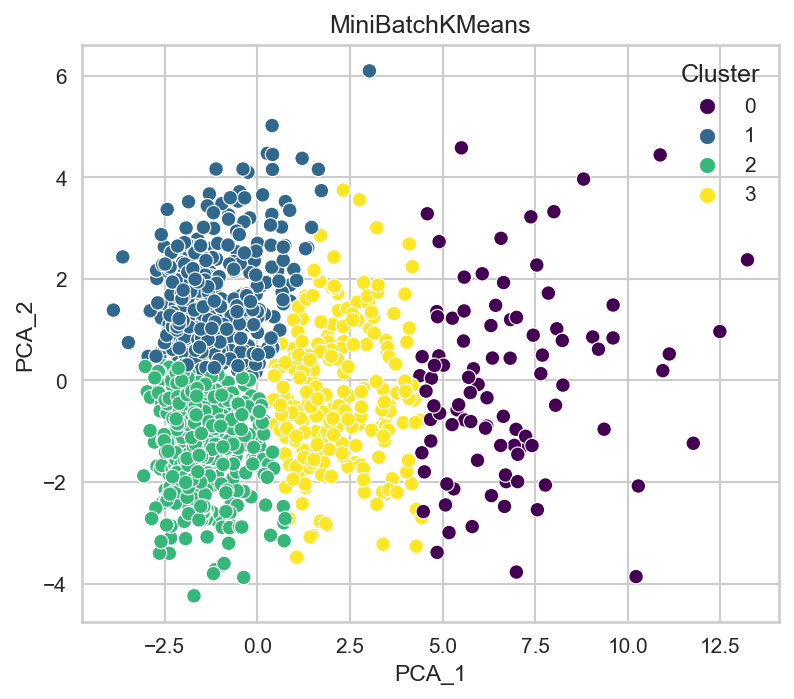

In [128]:

from sklearn.cluster import MiniBatchKMeans
KMeans_model = MiniBatchKMeans(n_clusters=4,random_state=42)
y_pred = KMeans_model.fit_predict(df_reduction_t)
#Add cluster to reduction dataset
df_reduction_t['Cluster'] = y_pred
df['Clusterm'] = y_pred
plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(x=df_reduction_t['PCA_1'],y=df_reduction_t['PCA_2'],hue=df_reduction_t['Cluster'],  palette='viridis', legend='full')
plt.title('MiniBatchKMeans')

In [83]:
from sklearn.metrics import silhouette_score

# Giả sử df_reduction_t là bộ dữ liệu của bạn với cột 'Cluster' đã được thêm vào
silhouette_avg = silhouette_score(df_reduction_t.iloc[:, :-1], df_reduction_t['Cluster'])
print(f"Điểm Silhouette: {silhouette_avg}")
print(f"Điểm Silhouette: {silhouette_avg}")
print(f"Điểm Silhouette: {silhouette_avg}")


Điểm Silhouette: 0.3936909716560493


In [92]:
silhouette_avg_1 = silhouette_score(df_reduction1.iloc[:, :-1], df_reduction1['Cluster'])
silhouette_avg_2 = silhouette_score(df_reduction2.iloc[:, :-1], df_reduction2['cluster'])
silhouette_avg_3 = silhouette_score(df_reduction_t.iloc[:, :-1], df_reduction_t['Cluster'])
print(f"Điểm Silhouette mô hình Kmeans: {silhouette_avg_1:.2f}")
print(f"Điểm Silhouette mô hình DBScan: {silhouette_avg_2:.2f}")
print(f"Điểm Silhouette mô hình MiniBatchKmeans: {silhouette_avg_3:.2f}")

Điểm Silhouette mô hình Kmeans: 0.37
Điểm Silhouette mô hình DBScan: 0.07
Điểm Silhouette mô hình MiniBatchKmeans: 0.39


In [84]:
df_reduction_t 

,PCA_1,PCA_2,Cluster
0,-1.556245,-1.176028,0
1,-1.581689,0.555600,2
2,4.905551,2.735371,1
3,-0.345759,-0.088841,0
4,-1.402452,-0.515081,0
...,...,...,...
1205,6.646240,1.928438,1
1206,-2.155633,2.647937,2
1207,-2.134485,0.242618,0
1208,8.806652,3.967336,1


<Axes: xlabel='Cluster', ylabel='Children'>

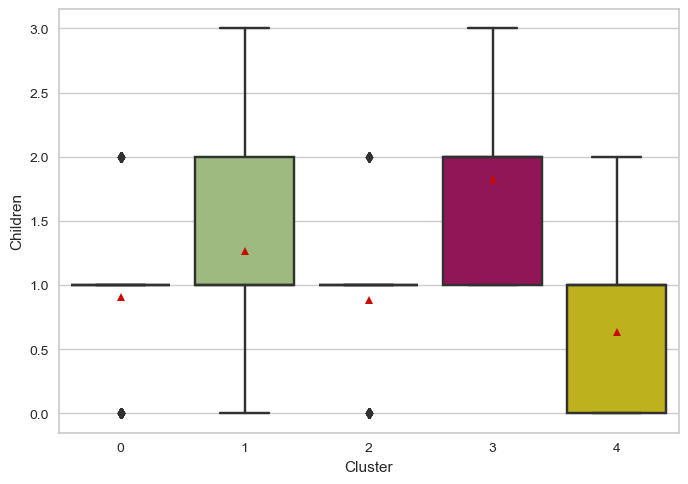

In [97]:
sns.boxplot(y=df['Children'],x=df['Cluster'],showmeans=True)